In [5]:
from os import listdir
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
from matplotlib.colors import LogNorm
from PIL import Image as PImage

In [6]:
def loadImages(path):
    # return array of images
    imagesList = listdir(path)
    loadedImages = []
    files_name = []
    for image in imagesList:
      hdu_list = fits.open(path + '/' + image)
      image_data = hdu_list[0].data
      loadedImages.append(image_data)
      files_name.append(image)
    hdu_list.close()
    return loadedImages, files_name

In [7]:
number_of_file = 10

In [8]:
# fits_image_filename = fits.util.get_testdata_filepath('../data/fits/{}.fits'.format(number_of_file))
hdu_list = fits.open('../data/fits/{}.fits'.format(number_of_file))
hdu_list.info()

Filename: ../data/fits/10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1878   ()      
  1  SCI           1 ImageHDU        82   (20921, 16750)   float32   
  2  WHT           1 ImageHDU        44   (20921, 16750)   float32   
  3  CTX           1 ImageHDU        35   ()      
  4  HDRTAB        1 BinTableHDU    638   72R x 314C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 23A, D, D, D, D, K, K, K, 8A, K, 23A, 9A, 20A, K, 4A, K, K, K, K, K, K, 23A, D, D, D, D, K, K, 3A, 3A, 4A, 7A, L, D, D, D, 23A, 1A, K, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, K, D, 6A, 9A, 8A, D, D, L, 4A, 44A, 3A, K, 7A, 5A, 3A, D, 13A, 8A, 4A, 3A, L, K, L, K, L, K, K, D, D, D, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, 23A, L, 1A, 3A, 1A, D, 3A, 6A, K, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, D, D, 1A, K

In [104]:
image_data = hdu_list['SCI'].data

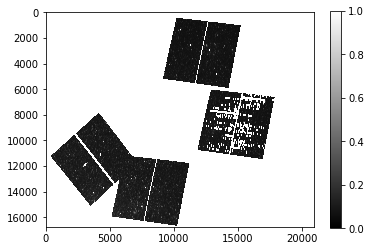

In [105]:
plt.imshow(image_data, cmap='gray', vmin=0, vmax=1)
# plt.imshow(image_data, cmap='gray', vmin=0, vmax=1)
plt.colorbar()

In [106]:
min_pixel = np.min(image_data)
max_pixel = np.max(image_data)
mean_pixel = np.mean(image_data)
std_pixel = np.std(image_data)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: nan
Max: nan
Mean: nan
Stdev: nan


# fill death pixel with 0

In [107]:
imgs_arr_scaled = image_data.copy()
# imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = -100
imgs_arr_scaled[np.isnan(imgs_arr_scaled)] = 0

""" 
from this experiment, we know that scaled to 0 is better than scaled to 100
"""

' \nfrom this experiment, we know that scaled to 0 is better than scaled to 100\n'

In [108]:
min_pixel = np.min(imgs_arr_scaled)
max_pixel = np.max(imgs_arr_scaled)
mean_pixel = np.mean(imgs_arr_scaled)
std_pixel = np.std(imgs_arr_scaled)
print('Min:', min_pixel)
print('Max:', max_pixel)
print('Mean:', mean_pixel)
print('Stdev:', std_pixel)

Min: -0.02010309
Max: 97.75638
Mean: 0.030720688
Stdev: 0.17188524


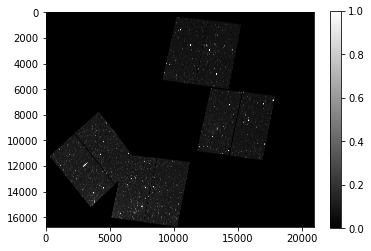

In [109]:
plt.imshow(imgs_arr_scaled, cmap='gray', vmin=0, vmax=1)
# plt.imshow(imgs_arr_scaled, cmap='gray')
# plt.imshow(imgs[0], norm=LogNorm(), cmap=plt.cm.Greys,
#                 interpolation='bilinear')
# plt.imshow(imgs[0], cmap='Greys')
plt.colorbar()

# Export FITS file

In [110]:
hdu = fits.PrimaryHDU(imgs_arr_scaled) # save img into google drive
hdulist = fits.HDUList([hdu])
path = '../data/scaled_fits/{}.fits'.format(number_of_file)
# path = 'C:/Users/news1/desktop/{}.fits'.format(number_of_file)
hdulist.writeto(path)